# <center> <u> Strong Correlation Coefficient </u> </center> 

## 1. <u> Cholesky Decomposition </u>

#### - Generates correlated random variables. 

## 2. <u> Sum of Squared Error </u>

#### - Correlation is a a measure of the linear relationship between two random variables, but is non linear measurement!!!

In [1]:
import numpy as np
import pandas as pd 

from numba import jit, prange
from scipy import stats
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

## <center> Set Seaborn Plot Theme </center> 

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "pastel",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Cholesky Decomposition </center>

## <center> $ x_{1} = z_{1} $ </center>

## <center> $ x_{2} = \rho z_{1} + \sqrt{1 - \rho^2} z_{2} $ </center> 

In [3]:
@jit(nopython = True, parallel = True)
def compute_cholesky_decomposition(p):
    """
    
    """
    
    N = 10000
    x1 = np.zeros(N)
    x2 = np.zeros(N)
    
    z1 = np.random.normal(0, 1, N)
    z2 = np.random.normal(0, 1, N)
    
    x1 = z1
    
    for i in prange(N):
        x2[i] = p * z1[i] + np.sqrt(1 - p**2) * z2[i]
    
    
    return x1, x2

## <center> Pearsons Correlation </center> 

## <center> $ \rho = \frac{\sum_{i=1}^{N} (x_{i} - \hat{x}) (y_{i} - \hat{y})}{\sum_{i=1}^{N} \sqrt{(x_{i} - \hat{x})^{2}} 
\sum_{i=1}^{N} \sqrt{(y_{i} - \hat{y})^{2}}} $ </center> 

## <center> Coefficient of Determination </center>

## <center> $ R^2 = 1 - \frac{\sum_{i=1}^{N} (y_{i} - f_{i})^2}{\sum_{i=1}^{N} (y_{i} - \hat{y})^2} $ </center>

In [4]:
@jit(nopython = True, parallel = True)
def compute_r2(y, y_hat):
    """
    
    """
    
    RSS = np.sum((y - y_hat)**2)
    TSS = np.sum((y_hat - np.mean(y_hat))**2)
    
    R2 = 1 - (RSS / TSS)
    
    return R2

In [5]:
rho = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
sse = np.copy(rho)
r2 = np.copy(rho)

for i, p in enumerate(rho):
    X, y = compute_cholesky_decomposition(p)
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    predictions = reg.predict(X.reshape(-1, 1))
    
    sse[i] = np.sum((predictions - y)**2)
    r2[i] = compute_r2(predictions, y)

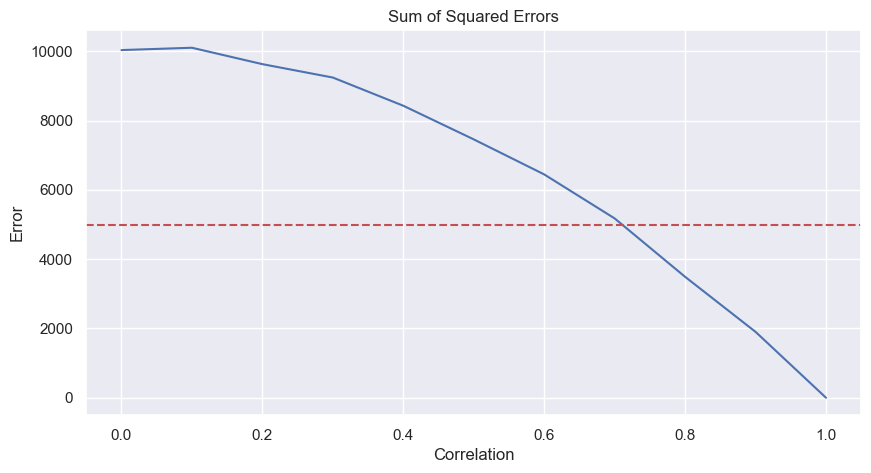

In [6]:
ax = sns.lineplot(
    x = rho,
    y = sse,
)

plt.axhline(
    y = 5000, 
    color = 'r', 
    linestyle = '--',
)

ax.set(
    title = "Sum of Squared Errors",
    xlabel = "Correlation",
    ylabel = "Error",
)

plt.show()

## <center> Prediction Interval Reduction Factor </center> 

## <center> $ 1 - \sqrt{1 - \rho^{2}}$ </center>

In [7]:
x = np.linspace(0, 1, 1000)
y = 1 - np.sqrt(1 - x**2)

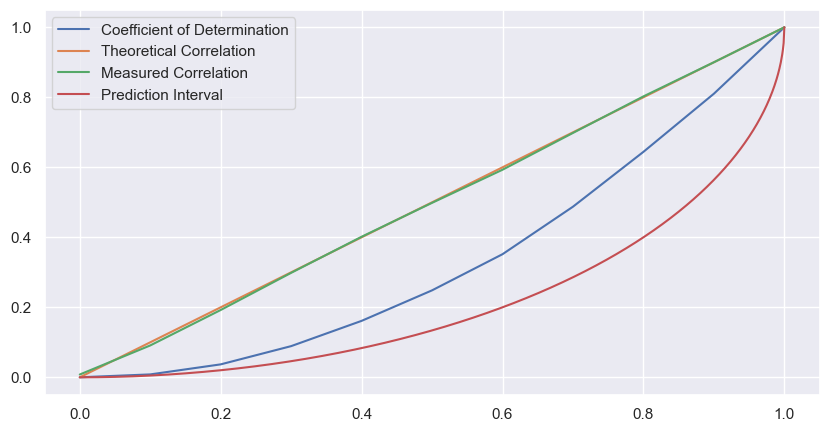

In [8]:
ax = sns.lineplot(
    x = rho,
    y = r2,
    label = "Coefficient of Determination",
)

sns.lineplot(
    x = rho,
    y = rho,
    label = "Theoretical Correlation"
)

sns.lineplot(
    x = rho,
    y = np.sqrt(r2),
    label = "Measured Correlation"
)

sns.lineplot(
    x = x,
    y = y,
    label = "Prediction Interval"
)

plt.show()

## <center> $ \rho = 0.0 $ </center>  

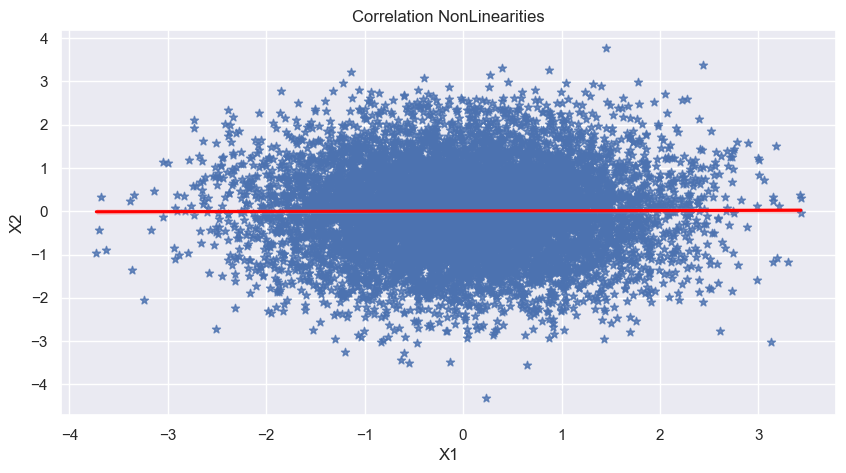

In [9]:
x1, x2 = compute_cholesky_decomposition(rho[0])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.1 $ </center>  

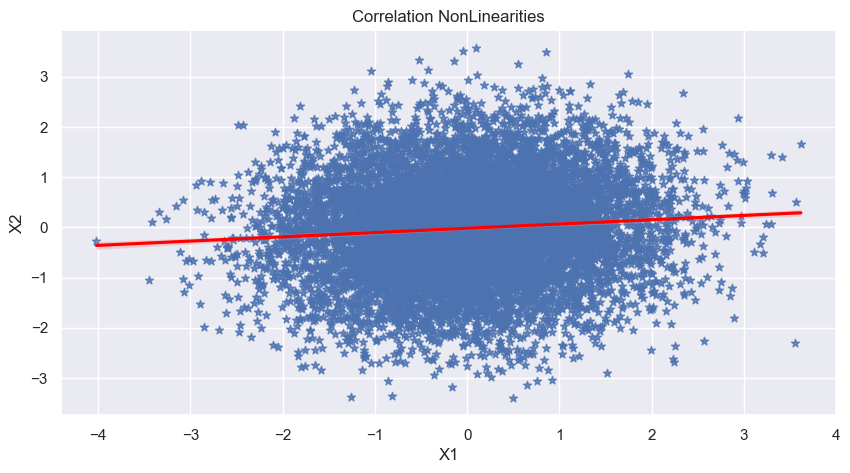

In [10]:
x1, x2 = compute_cholesky_decomposition(rho[1])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.2 $ </center>  

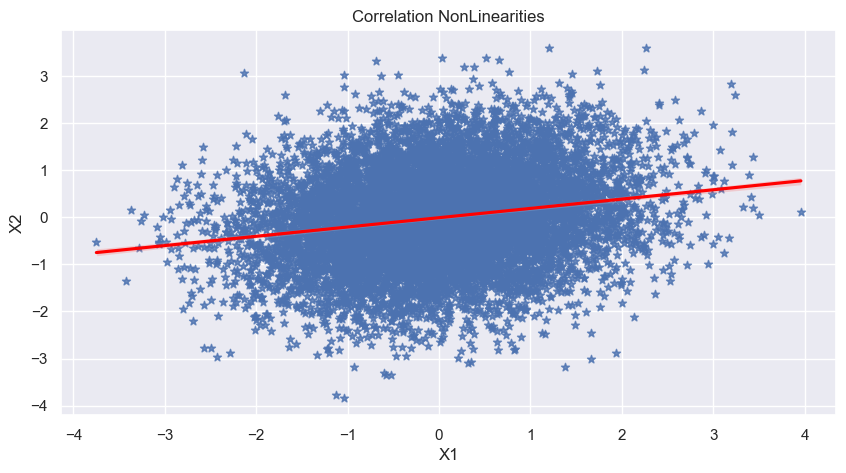

In [11]:
x1, x2 = compute_cholesky_decomposition(rho[2])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.3 $ </center>  

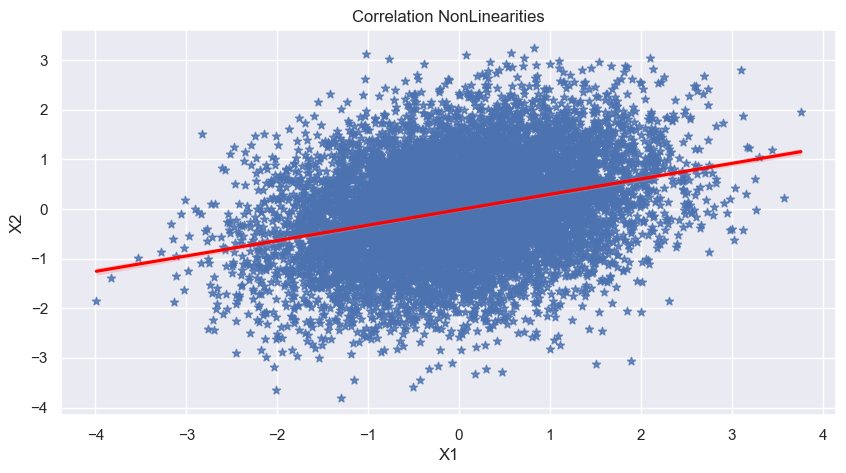

In [12]:
x1, x2 = compute_cholesky_decomposition(rho[3])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.4 $ </center>  

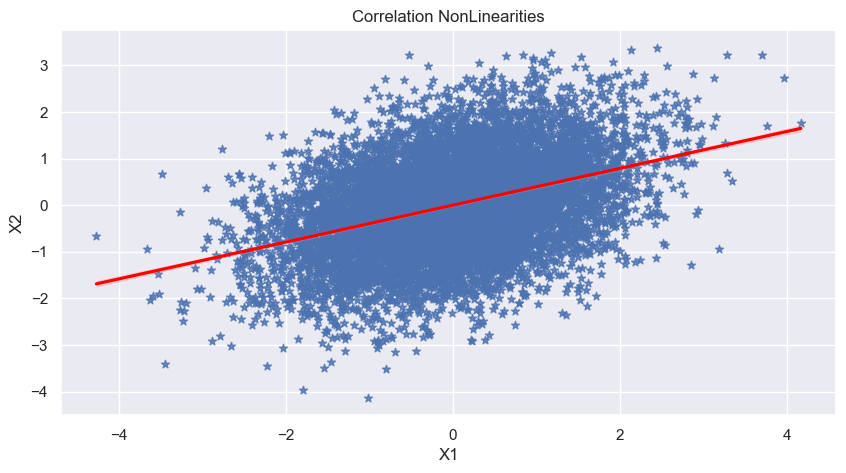

In [13]:
x1, x2 = compute_cholesky_decomposition(rho[4])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.5 $ </center>  

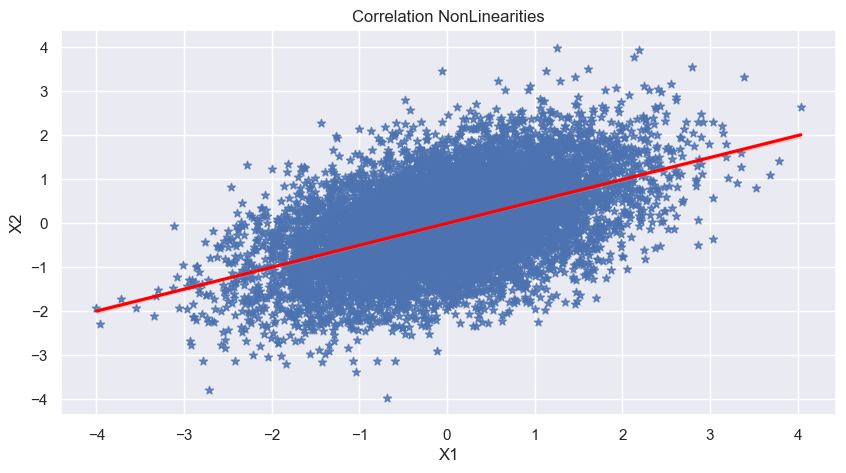

In [14]:
x1, x2 = compute_cholesky_decomposition(rho[5])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.6 $ </center>  

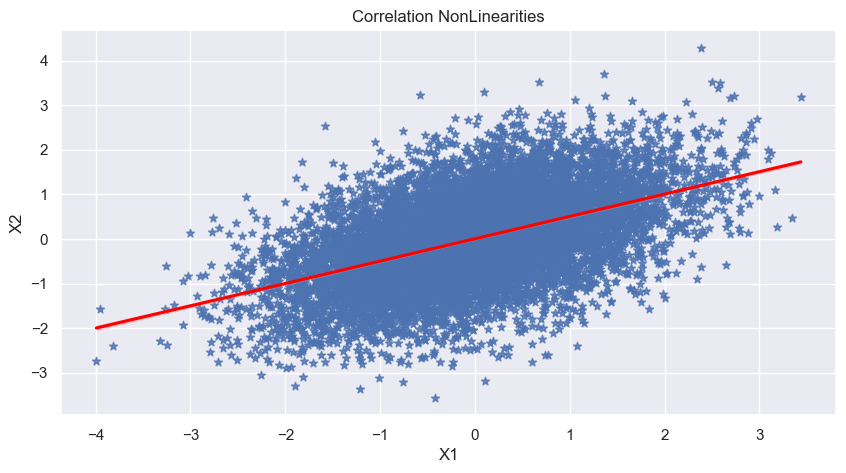

In [15]:
x1, x2 = compute_cholesky_decomposition(rho[5])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.7 $ </center>  

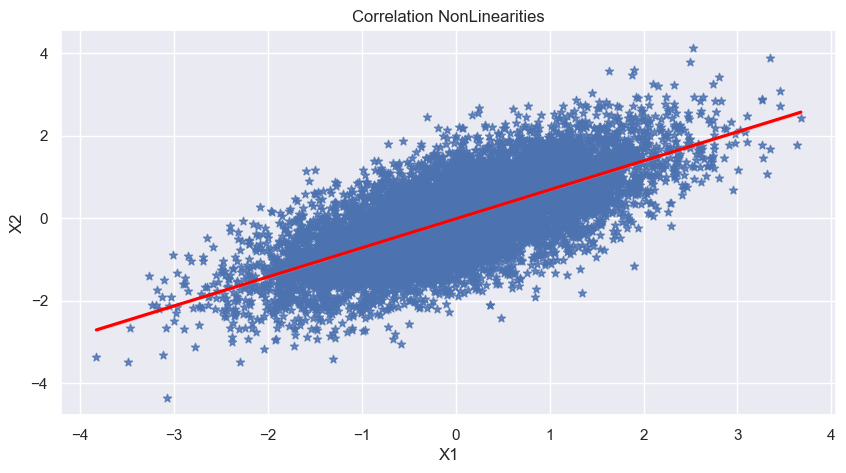

In [16]:
x1, x2 = compute_cholesky_decomposition(rho[7])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.8 $ </center>  

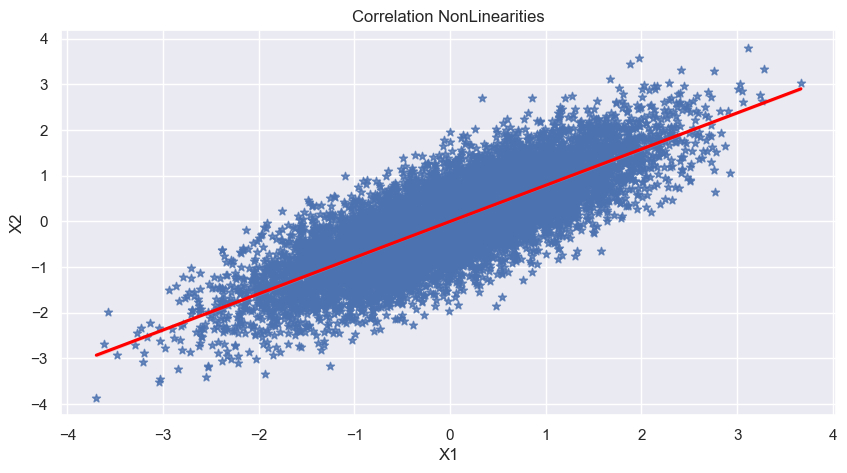

In [17]:
x1, x2 = compute_cholesky_decomposition(rho[8])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 0.9 $ </center>  

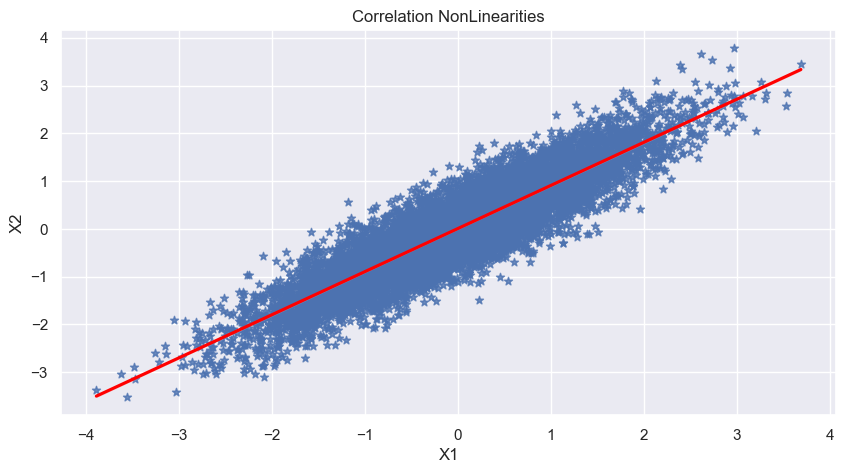

In [18]:
x1, x2 = compute_cholesky_decomposition(rho[9])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()

## <center> $ \rho = 1.0 $ </center>  

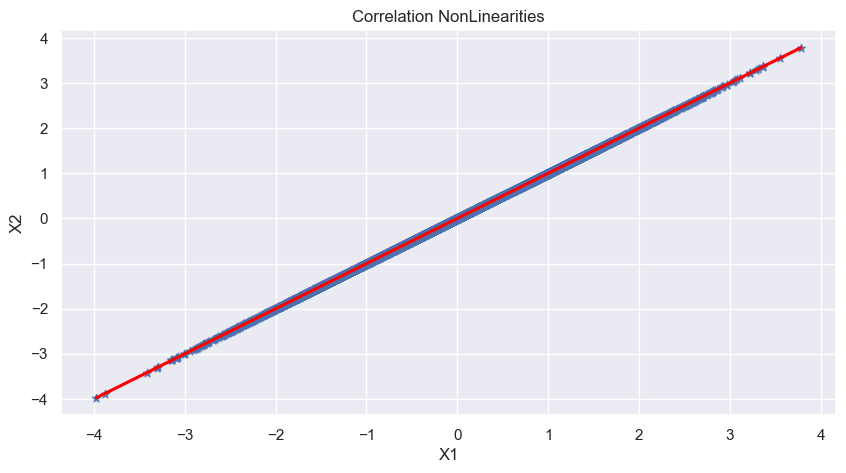

In [19]:
x1, x2 = compute_cholesky_decomposition(rho[10])
    
ax = sns.regplot(
    x = x1,
    y = x2,
    marker = "*",
    line_kws = {"color": "red"},
)

ax.set(
    title = "Correlation NonLinearities",
    xlabel = "X1",
    ylabel = "X2",
)

plt.show()